# 7T Precision NeuroImaging - `sub-PNC001_ses-01`

In [14]:
# Set the environment
import os
import numpy as np
import matplotlib as plt
import nibabel as nb
from nibabel.freesurfer.mghformat import load
from brainspace.plotting import plot_hemispheres
from brainspace.mesh.mesh_io import read_surface
from brainspace.datasets import load_conte69
from brainspace.gradient import GradientMaps
from brainspace.utils.parcellation import map_to_labels
from brainspace.mesh.array_operations import smooth_array
import seaborn as sns
import matplotlib.pyplot as mpl
import seaborn as sns


# Set the working directory to the 'out' directory
os.chdir("/data_/mica3/BIDS_PNI/") 

# This variable will be different for each subject
out='/data_/mica3/BIDS_PNI/derivatives_dev/'+ 'micapipe_v0.2.0/'
sub='sub-PNC002'
subjectID=sub+'_ses-01'
subjectDir=out + sub+'/ses-01'

# Set paths and variables
dir_FS = '/data_/mica3/BIDS_PNI/derivatives/fastsurfer/' + subjectID
dir_FSraw = '/data_/mica3/BIDS_PNI/derivatives_dev/fastsurfer/' + subjectID

# Load native pial surface
surf_lh = read_surface(dir_FS+'/surf/lh.pial', itype='fs')
surf_rh = read_surface(dir_FS+'/surf/rh.pial', itype='fs')

# Load native white matter surface
wm_lh = read_surface(dir_FS+'/surf/lh.white', itype='fs')
wm_rh = read_surface(dir_FS+'/surf/rh.white', itype='fs')

# Load native inflated surface
inf_lh = read_surface(dir_FS+'/surf/lh.inflated', itype='fs')
inf_rh = read_surface(dir_FS+'/surf/rh.inflated', itype='fs')

# Colormap
ColCurv= plt.colors.ListedColormap(['#A2CD5A', '#A0CA5B', '#9FC85C', '#9EC55D', '#9DC35E', '#9CC05F', '#9BBE61', '#9ABB62', '#99B963', '#98B664', '#96B465', '#95B166', '#94AF68', '#93AC69', '#92AA6A', '#91A76B', '#90A56C', '#8FA26D', '#8EA06F', '#8C9D70', '#8B9B71', '#8A9972', '#899673', '#889475', '#879176', '#868F77', '#858C78', '#848A79', '#82877A', '#81857C', '#80827D', '#7F807E', '#807D7D', '#827A7A', '#857777', '#877575', '#8A7272', '#8C6F6F', '#8F6C6C', '#916969', '#946666', '#966464', '#996161', '#9B5E5E', '#9D5B5B', '#A05858', '#A25656', '#A55353', '#A75050', '#AA4D4D', '#AC4A4A', '#AF4747', '#B14545', '#B44242', '#B63F3F', '#B93C3C', '#BB3939', '#BE3636', '#C03434', '#C33131', '#C52E2E', '#C82B2B', '#CA2828', '#CD2626'])
grey = plt.colors.ListedColormap(np.full((256, 4), [0.65, 0.65, 0.65, 1]))


In [15]:
# Load native pial surface
surf_lhr = read_surface(dir_FSraw+'/surf/lh.pial', itype='fs')
surf_rhr = read_surface(dir_FSraw+'/surf/rh.pial', itype='fs')

# Load native inflated surface
inf_lhr = read_surface(dir_FSraw+'/surf/lh.inflated', itype='fs')
inf_rhr = read_surface(dir_FSraw+'/surf/rh.inflated', itype='fs')

# Load native white matter surface
wm_lhr = read_surface(dir_FSraw+'/surf/lh.white', itype='fs')
wm_rhr = read_surface(dir_FSraw+'/surf/rh.white', itype='fs')

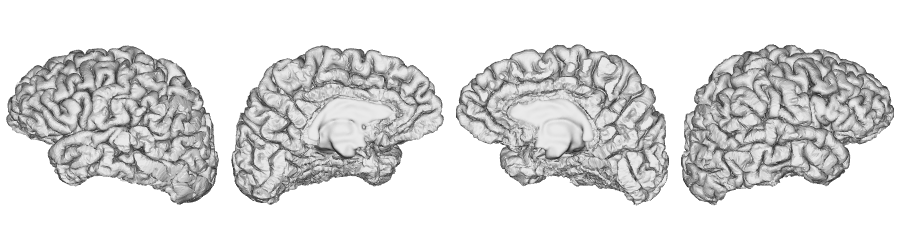

In [16]:
# Plot the surface
plot_hemispheres(surf_lh, surf_rh, size=(900, 250), zoom=1.25, embed_nb=True, interactive=False, share='both',
                 nan_color=(0, 0, 0, 1), color_range=(1.5, 4), cmap=grey, transparent_bg=False)

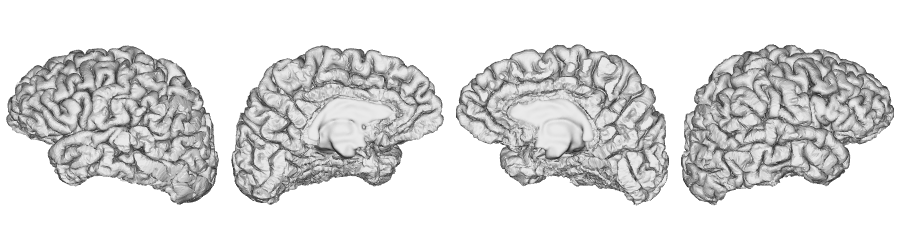

In [17]:
# Plot the surface
plot_hemispheres(surf_lhr, surf_rhr, size=(900, 250), zoom=1.25, embed_nb=True, interactive=False, share='both',
                 nan_color=(0, 0, 0, 1), color_range=(1.5, 4), cmap=grey, transparent_bg=False)

# Morphology | fastsurfer 
## Manual corrections

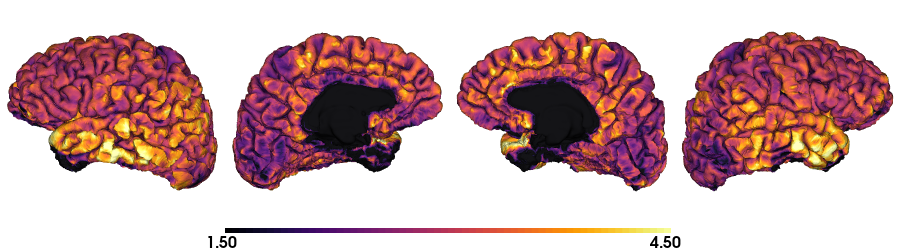

In [18]:
# Freesurfer native thickness
th = np.concatenate((nb.freesurfer.read_morph_data(dir_FS + '/surf/lh.thickness'), nb.freesurfer.read_morph_data(dir_FS + '/surf/rh.thickness')), axis=0)
plot_hemispheres(surf_lh, surf_rh, array_name=th, size=(900, 250), color_bar='bottom', zoom=1.25, embed_nb=True, interactive=False, share='both',
                     nan_color=(0, 0, 0, 1), color_range=(1.5, 4.5), cmap="inferno",transparent_bg=False)

## Raw output

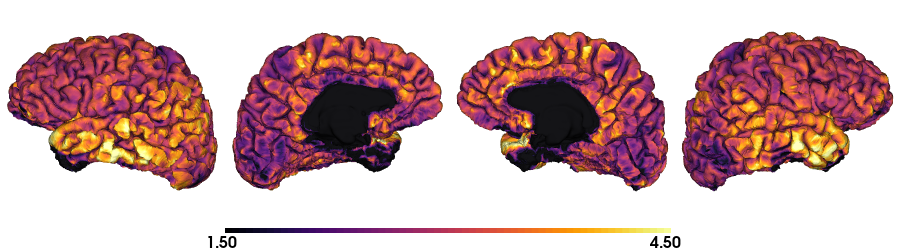

In [19]:
# Freesurfer native thickness
thr = np.concatenate((nb.freesurfer.read_morph_data(dir_FSraw + '/surf/lh.thickness'), nb.freesurfer.read_morph_data(dir_FSraw + '/surf/rh.thickness')), axis=0)
plot_hemispheres(surf_lhr, surf_rhr, array_name=thr, size=(900, 250), color_bar='bottom', zoom=1.25, embed_nb=True, interactive=False, share='both',
                     nan_color=(0, 0, 0, 1), color_range=(1.5, 4.5), cmap="inferno",transparent_bg=False)

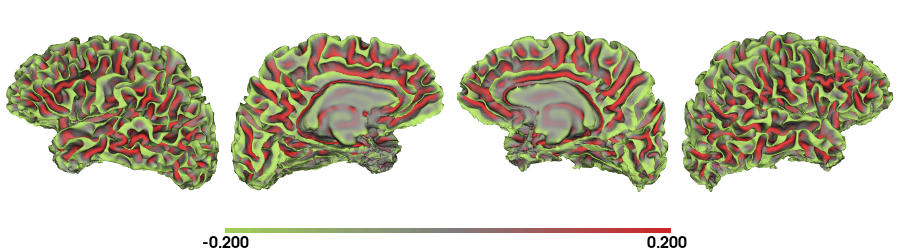

In [20]:
# Freesurfer native curvature
cv = np.concatenate((nb.freesurfer.read_morph_data(dir_FS + '/surf/lh.curv'), nb.freesurfer.read_morph_data(dir_FS + '/surf/rh.curv')), axis=0)
plot_hemispheres(wm_lh, wm_rh, array_name=cv, size=(900, 250), color_bar='bottom', zoom=1.25, embed_nb=True, interactive=False, share='both',
                     nan_color=(0, 0, 0, 1), color_range=(-0.2, 0.2), cmap=ColCurv,transparent_bg=False)

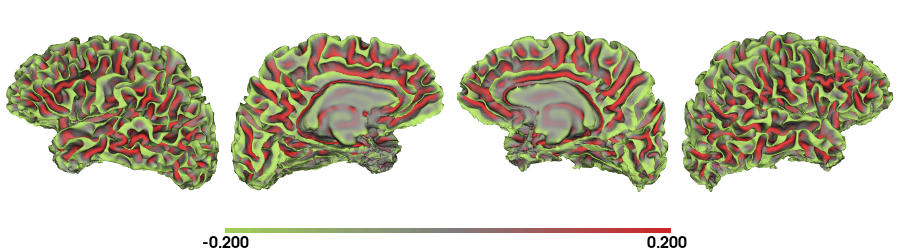

In [21]:
# Freesurfer native curvature
cv = np.concatenate((nb.freesurfer.read_morph_data(dir_FSraw + '/surf/lh.curv'), nb.freesurfer.read_morph_data(dir_FSraw + '/surf/rh.curv')), axis=0)
plot_hemispheres(wm_lhr, wm_rhr, array_name=cv, size=(900, 250), color_bar='bottom', zoom=1.25, embed_nb=True, interactive=False, share='both',
                     nan_color=(0, 0, 0, 1), color_range=(-0.2, 0.2), cmap=ColCurv,transparent_bg=False)

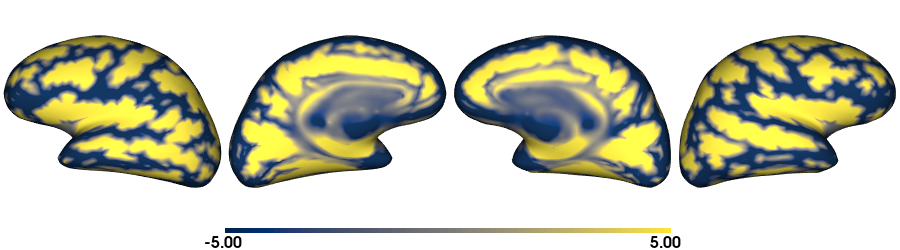

In [22]:
# Freesurfer native sulcal depth
sd = np.concatenate((nb.freesurfer.read_morph_data(dir_FS + '/surf/lh.sulc'), nb.freesurfer.read_morph_data(dir_FS + '/surf/rh.sulc')), axis=0)
plot_hemispheres(inf_lh, inf_rh, array_name=sd, size=(900, 250), color_bar='bottom', zoom=1.25, embed_nb=True, interactive=False, share='both',
                     nan_color=(0, 0, 0, 1), color_range=(-5, 5), cmap='cividis',transparent_bg=False)

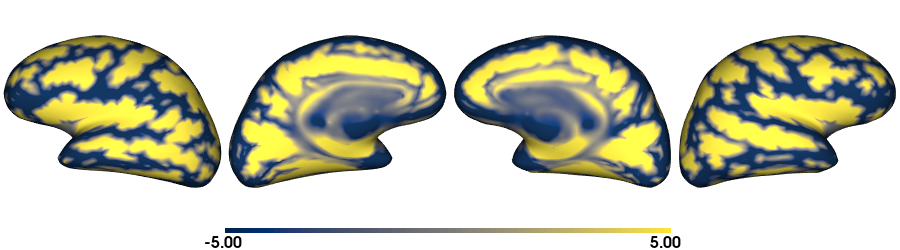

In [23]:
# Freesurfer native sulcal depth
sd = np.concatenate((nb.freesurfer.read_morph_data(dir_FSraw + '/surf/lh.sulc'), nb.freesurfer.read_morph_data(dir_FSraw + '/surf/rh.sulc')), axis=0)
plot_hemispheres(inf_lhr, inf_rhr, array_name=sd, size=(900, 250), color_bar='bottom', zoom=1.25, embed_nb=True, interactive=False, share='both',
                     nan_color=(0, 0, 0, 1), color_range=(-5, 5), cmap='cividis',transparent_bg=False)

In [33]:
# Variables
micapipe='/data_/mica1/01_programs/micapipe-v0.2.0'

# Here we define the atlas
atlas= 'schaefer-100'#'glasser-360'  #'glasser-360' 'aparc-a2009s' 'schaefer-400'

# Read label for conte69
labels_c69 = np.loadtxt(open(micapipe + '/parcellations/' + atlas + '_conte69.csv'), dtype=int)

# mask of the medial wall
mask_c69 = labels_c69 != 0

# Load annotation file in fsaverage5
annot_lh_fs5= nb.freesurfer.read_annot(micapipe + '/parcellations/lh.'+atlas+'_mics.annot')
Ndim = max(np.unique(annot_lh_fs5[0]))
annot_rh_fs5= nb.freesurfer.read_annot(micapipe + '/parcellations/rh.'+atlas+'_mics.annot')[0]+Ndim

# Load the inflated surface
surf_inflated_dir = '/host/percy/local_raid/ke/toolbox/micasoft/parcellations/fs_LR-conte69/ColeAnticevic/'

# Load native mid surface
inf_lh = read_surface(surf_inflated_dir+'S1200.L.inflated_MSMAll.32k_fs_LR.surf.gii', itype='gii')
inf_rh = read_surface(surf_inflated_dir+'S1200.R.inflated_MSMAll.32k_fs_LR.surf.gii', itype='gii')


# Loading functions
def load_mpc(File, Ndim):
    """Loads and process a functional connectome"""
    
    # load the matrix
    mtx_mpc = np.loadtxt(File, dtype=float, delimiter=' ')
    
    # Mirror the matrix
    MPC = np.triu(mtx_mpc,1)+mtx_mpc.T
    
    # Remove the medial wall
    MPC = np.delete(np.delete(MPC, 0, axis=0), 0, axis=1)
    MPC = np.delete(np.delete(MPC, Ndim, axis=0), Ndim, axis=1)
    
    # replace inf with 0
    MPC[~np.isfinite(MPC)] = np.finfo(float).eps
    
    # replace inf with 0
    MPC[MPC==0] = np.finfo(float).eps
    
    return MPC

def load_gd(File, Ndim):
    """Loads and process a functional connectome"""
    
    # load the matrix
    mtx_gd = np.loadtxt(File, dtype=float, delimiter=' ')
    
    # Remove the Mediall Wall
    mtx_gd = np.delete(np.delete(mtx_gd, 0, axis=0), 0, axis=1)
    GD = np.delete(np.delete(mtx_gd, Ndim, axis=0), Ndim, axis=1)
    
    return GD

def load_fc(File, Ndim, parc='', Fz=True):
    """Loads and process a functional connectome"""
    
    # load the matrix
    mtx_fs = np.loadtxt(File, dtype=float, delimiter=' ')
    
    # slice the matrix remove subcortical nodes and cerebellum
    FC = mtx_fs[49:, 49:]
    
    # Remove the medial wall
    #if parc != 'glasser-360':
    FC = np.delete(np.delete(FC, Ndim, axis=0), Ndim, axis=1)
    
    if Fz == True:
        # Fishcer transform
        FCz = np.arctanh(FC)
    else:
        FCz = FC

    # replace inf with 0
    FCz[~np.isfinite(FCz)] = 0
    
    # Mirror the matrix
    FCz = np.triu(FCz,1)+FCz.T
    print(str(FCz.shape))
    return FCz

def load_sc(File, Ndim, log=True):
    """Loads and process a functional connectome"""
    
    # load the matrix
    mtx_sc = np.loadtxt(File, dtype=float, delimiter=' ')
    
    if log == True:
        # Mirror the matrix
        mtx_sc = np.log(np.triu(mtx_sc,1)+mtx_sc.T)
        mtx_sc[np.isneginf(mtx_sc)] = 0
    else:
        mtx_sc = np.triu(mtx_sc,1)+mtx_sc.T
        
    # slice the matrix remove subcortical nodes and cerebellum
    SC = mtx_sc[49:, 49:]
    SC = np.delete(np.delete(SC, Ndim, axis=0), Ndim, axis=1)
    
    # replace 0 values with almost 0
    SC[SC==0] = np.finfo(float).eps
    
    return SC

def plot_connectome(mtx, Title='matrix plot', xlab='X', ylab='Y', col='rocket', Vmin=None, Vmax=None):
    '''
    This optional function, only plots a connectome as a heatmap
    Parameters
    ----------
    mtx : np.array
    Returns
    -------
    f : plot
    '''
    f, ax = mpl.subplots(figsize=(15,10))
    g = sns.heatmap(mtx, ax=ax, cmap=col, vmin=Vmin, vmax=Vmax)
    g.set_xlabel(xlab)
    g.set_ylabel(ylab)
    g.set_title(Title)

def smooth_surf(surf_l, surf_r, points, Kernel='uniform', Niter=20, Relax=0.5, Mask=mask_c69):
    '''
    This function smooth an array (left and right) on a given surface
    Parameters
    ----------
    surf_l : np.array left surface 
    surf_r : np.array right surface
    points : np.array surface data
    Kernel : {'uniform', 'gaussian', 'inverse_distance'}
    Niter  : int, optional Number of smooth iterations
    Relax  : relax : float, optional relaxation facto
    Mask   : str or 1D ndarray, optional
    Returns
    -------
    sdata : smoothed numpy array
    
    '''
    n2dim = int(Mask.shape[0]/2)
    Mask_l=mask_c69[0:n2dim]
    Mask_r=mask_c69[n2dim:Mask.shape[0]]
    sdata = np.concatenate((smooth_array(surf_l, points[0:32492],kernel=Kernel, n_iter=Niter,relax=Relax, mask=Mask_l), 
                          smooth_array(surf_r, points[32492:64984],kernel=Kernel, n_iter=Niter,relax=Relax, mask=Mask_r)), axis=0)
    return(sdata)

c5k_lhi = read_surface(micapipe + '/surfaces/fsLR-5k.L.inflated.surf.gii', itype='gii')
c5k_rhi = read_surface(micapipe + '/surfaces/fsLR-5k.R.inflated.surf.gii', itype='gii')

# 25	PSL	PeriSylvian Language Area
# 105	PFcm	Area PFcm
# 148	PF	Area PF Complex
# 149	PFm	Area PFm Complex
###rois = np.zeros((Ndim*2,Ndim*2), dtype=int)
###indx = np.array([32,33,34,160, 32+180,33+180,34+180,160+180]) # glasser
# indx = np.array([95,96,97,98,197,198,199]) # shaeffer 200
###indx = np.array([189,190,191,192,193,194,195,196,197,198,199,
###                391,392,393,394,395,396,397,398,399]) # shaeffer 400
###rois[indx,:] = 1
###rois[:,indx] = 1

# Geodesic distance gradient

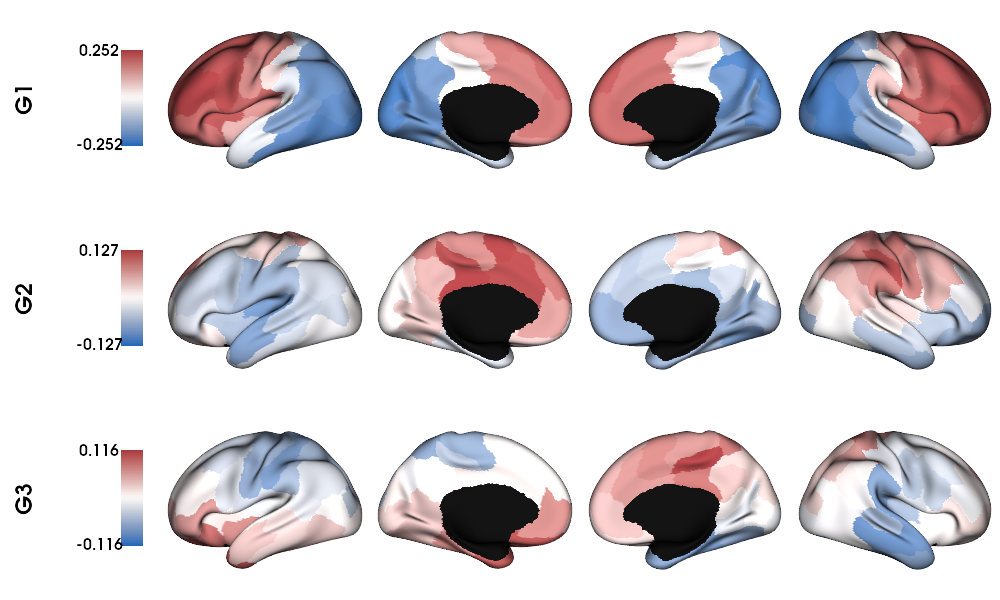

In [34]:
gd_file = subjectDir + '/dist/' + subjectID + '_atlas-' + atlas + '_GD.txt' 
gd = load_gd(gd_file, Ndim)

# GD Left hemi
Ngrad=3
S=0.8
gm_GD_L = GradientMaps(n_components=Ngrad, random_state=None, approach='dm', kernel='normalized_angle')
gm_GD_L.fit(gd[0:Ndim, 0:Ndim], sparsity=S)

# GD Right hemi
gm_GD_R = GradientMaps(n_components=Ngrad, alignment='procrustes', kernel='normalized_angle'); # align right hemi to left hemi
gm_GD_R.fit(gd[Ndim:Ndim*2, Ndim:Ndim*2], sparsity=0.8, reference=gm_GD_L.gradients_)

# Left and right gradients concatenated
GD_gradients = np.concatenate((gm_GD_L.gradients_, gm_GD_R.gradients_), axis=0)

# Map gradients to original parcels
grad = [None] * Ngrad
for i, g in enumerate(GD_gradients.T[0:Ngrad,:]):
     grad[i] = map_to_labels(g, labels_c69, fill=np.nan, mask=mask_c69)

# Plot Gradients
labels=['G'+str(x) for x in list(range(1,Ngrad+1))]
plot_hemispheres(inf_lh, inf_rh, array_name=grad, size=(1000, 600), cmap='vlag',
                  embed_nb=True,  label_text={'left':labels}, color_bar='left',
                  zoom=1.25, nan_color=(0, 0, 0, 1), color_range='sym')

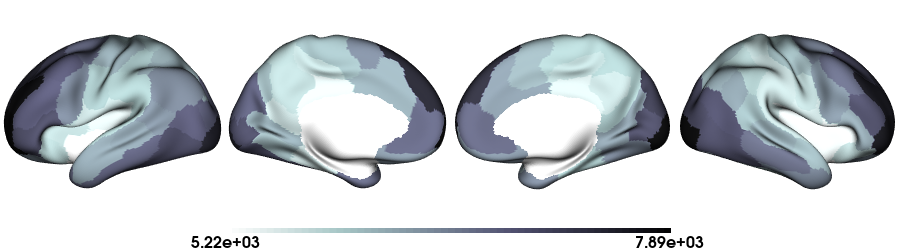

In [35]:
# surface plotting
mtx_G = np.sum(gd,axis=1)

# ---------------------------------
G_surf = map_to_labels(mtx_G, labels_c69, fill=np.nan, mask=mask_c69)

# Plot surface data 
plot_hemispheres(inf_lh, inf_rh, array_name=G_surf, size=(900, 250), color_bar='bottom', zoom=1.25, 
                 embed_nb=True, interactive=False, share='both', nan_color=(1, 1, 1, 1), 
                 cmap='bone_r',transparent_bg=False, color_range=None)

# GD vertex-wise `fsLR-5k`

# MPC gradient

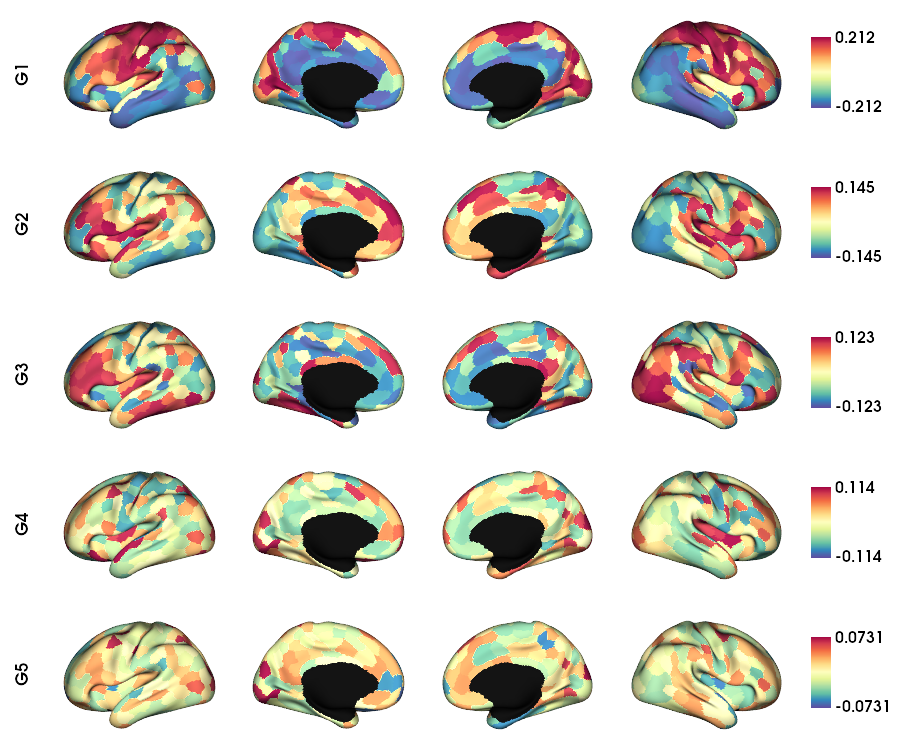

In [14]:
Ngrad=5
mpc_acq='acq-qt1'
mpc_file = subjectDir + '/mpc/' + mpc_acq + '/' + subjectID + '_space-fsnative_atlas-' + atlas + '_desc-MPC.txt'
mpc = load_mpc(mpc_file, Ndim)

# Calculate the gradients
gm = GradientMaps(n_components=Ngrad, random_state=None, approach='dm', kernel='normalized_angle')
gm.fit(mpc, sparsity=S)

# Map gradients to original parcels
grad = [None] * Ngrad
for i, g in enumerate(gm.gradients_.T[0:Ngrad,:]):
     grad[i] = map_to_labels(g, labels_c69, fill=np.nan, mask=mask_c69)

# Plot Gradients
labels=['G'+str(x) for x in list(range(1,Ngrad+1))]
plot_hemispheres(inf_lh, inf_rh, array_name=grad, cmap='Spectral_r',
                  embed_nb=True,  label_text={'left':labels}, color_bar='right',
                  zoom=1.3, size=(900, 750), nan_color=(0, 0, 0, 1), color_range='sym',
                  screenshot=False, filename='/home/bic/rcruces/Desktop/MPC_'+subjectID+'_'+atlas+'.png') 


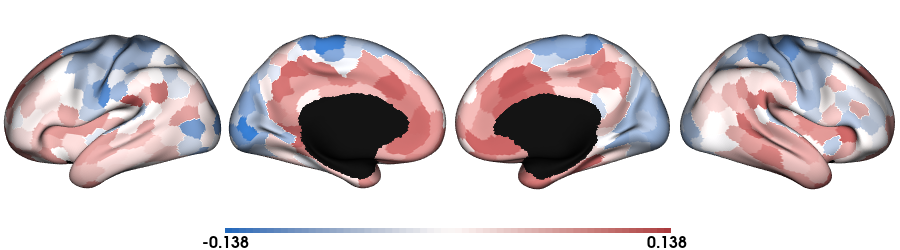

In [66]:
# surface plotting
mtx_M = np.mean(mpc,axis=1)

# ---------------------------------
M_surf = map_to_labels(mtx_M, labels_c69, fill=np.nan, mask=mask_c69)

# Plot surface data 
plot_hemispheres(inf_lh, inf_rh, array_name=M_surf, size=(900, 250), color_bar='bottom', zoom=1.25, 
                 embed_nb=True, interactive=False, share='both', nan_color=(0, 0, 0, 1), 
                 cmap='vlag',transparent_bg=False, color_range='sym')

In [ ]:
# save fsLR-5k mask as func.gii
mask_lh = mask_lh.astype(int)
# intent is a code related to the data
# NIFTI_INTENT_SHAPE - 2005
gifti_data = nb.gifti.GiftiDataArray(data=mask_lh, intent=2005, datatype=8)
gifti_img = nb.gifti.GiftiImage(meta=None, darrays=[gifti_data])
nb.save(img=gifti_img, filename='/data/mica1/01_programs/micapipe-v0.2.0/surfaces/fsLR-5k.L.mask.shape.gii')

# right mask
mask_rh = mask_lh.astype(int)
# intent is a code related to the data
# NIFTI_INTENT_SHAPE - 2005
gifti_data = nb.gifti.GiftiDataArray(data=mask_rh, intent=2005, datatype=8)
gifti_img = nb.gifti.GiftiImage(meta=None, darrays=[gifti_data])
nb.save(img=gifti_img, filename='/data/mica1/01_programs/micapipe-v0.2.0/surfaces/fsLR-5k.R.mask.shape.gii')

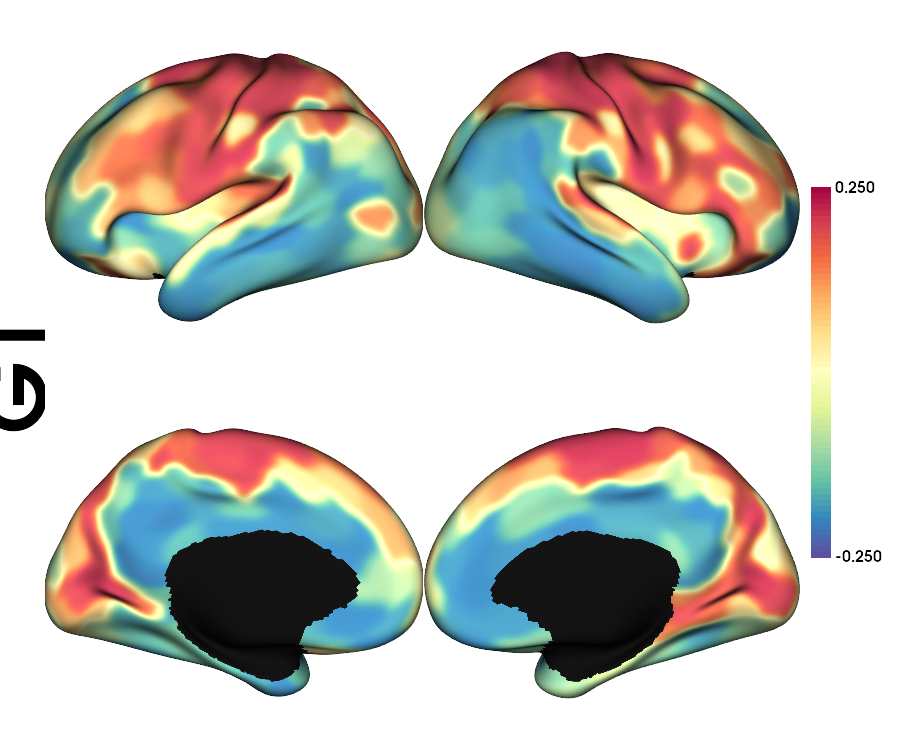

In [16]:
# Plot G1
MPC_g1 = map_to_labels(gm.gradients_[:,0], labels_c69, fill=np.nan, mask=mask_c69)
plot_hemispheres(inf_lh, inf_rh, array_name=smooth_surf(inf_lh, inf_rh,MPC_g1, Niter=10), cmap='Spectral_r',
                  embed_nb=True,  label_text={'left':['G1']}, color_bar='right',
                  layout_style='grid',
                  zoom=1.3, size=(900, 750), nan_color=(0, 0, 0, 1), color_range=(-0.25,0.25),
                  screenshot=False, filename='/home/bic/rcruces/Desktop/MPC-G1_'+subjectID+'_'+atlas+'.png') 

# Functional gradient

In [57]:
func_acq='desc-me_task-rest_bold'
func_file = subjectDir + '/func/'+func_acq+'/surf/' + subjectID + '_func_space-conte69-32k_atlas-' + atlas + '_desc-FC.txt'
func_file = subjectDir + '/func/'+func_acq+'/surf/' + subjectID + '_func_space-fsnative_atlas-' + atlas + '_desc-FC.txt'

fc = load_fc(func_file, Ndim, parc=atlas, Fz=False)
#func_space-fsnative_atlas-
#func_space-conte69-32k_atlas-

(400, 400)


In [36]:
fc_c69=np.loadtxt(func_file, dtype=float, delimiter=' ')
fc_nat=np.loadtxt(func_fifs, dtype=float, delimiter=' ')
print(fc_c69.shape)
print(fc_nat.shape)

(449, 449)
(450, 450)


In [53]:
nt = 48
np.array_equal(fc_c69[1:nt,1:nt], fc_nat[1:nt,1:nt])

True

In [46]:
fc_c69[1:5].shape

(4, 449)

In [47]:
fc_nat[1:5].shape

(4, 450)

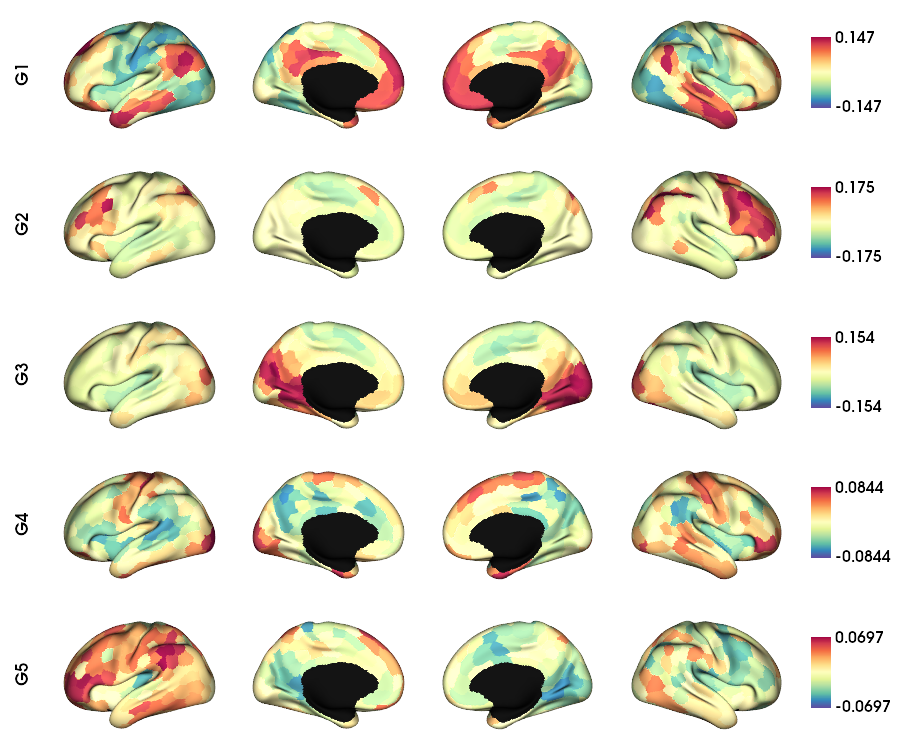

In [58]:
# Calculate the gradients
Ngrad=5
gm = GradientMaps(n_components=Ngrad, random_state=None, approach='dm', kernel='normalized_angle')
gm.fit(fc, sparsity=S)

# Map gradients to original parcels
grad = [None] * Ngrad
for i, g in enumerate(gm.gradients_.T[0:Ngrad,:]):
     grad[i] = map_to_labels(g, labels_c69, fill=np.nan, mask=mask_c69)


# Plot Gradients RdYlBu
labels=['G'+str(x) for x in list(range(1,Ngrad+1))]
plot_hemispheres(inf_lh, inf_rh, array_name=grad, cmap='Spectral_r',
                  embed_nb=True,  label_text={'left':labels}, color_bar='right',
                  zoom=1.3, size=(900, 750), nan_color=(0, 0, 0, 1), color_range='sym',
                  screenshot=False, filename='/home/bic/rcruces/Desktop/FC_'+subjectID+'_'+atlas+'.png') 

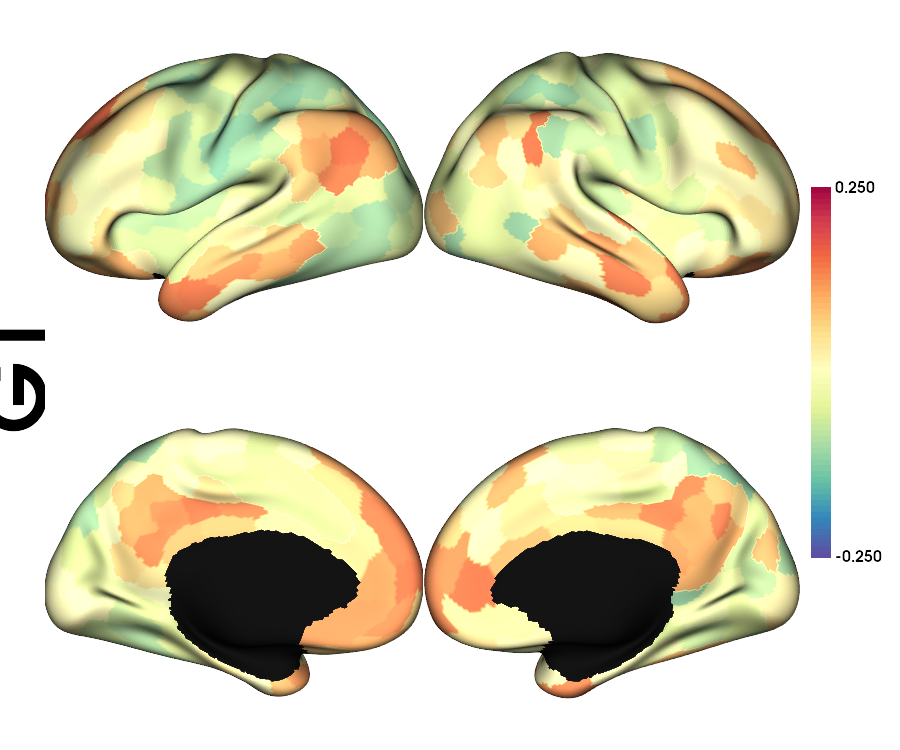

In [21]:
# Plot G1
FC_g1 = map_to_labels(gm.gradients_[:,0], labels_c69, fill=np.nan, mask=mask_c69)
plot_hemispheres(inf_lh, inf_rh, array_name=FC_g1, cmap='Spectral_r',
                  embed_nb=True,  label_text={'left':['G1']}, color_bar='right',
                  layout_style='grid', color_range=(-0.25,0.25),
                  zoom=1.3, size=(900, 750), nan_color=(0, 0, 0, 1),
                  screenshot=False, filename='/home/bic/rcruces/Desktop/FC-G1_'+subjectID+'_'+atlas+'.png') 

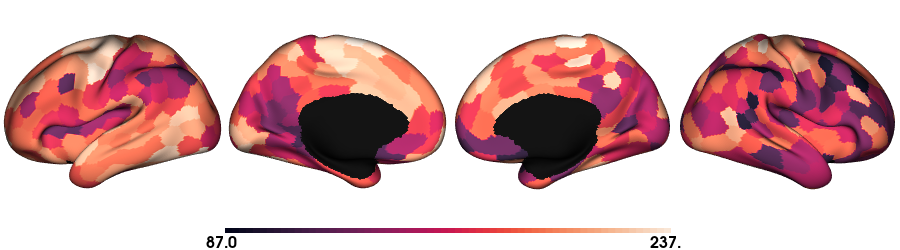

In [22]:
# surface plotting
fc_pos = np.copy(fc)
fc_pos[(0>fc_pos)] = 0
mtx_F = np.sum(fc_pos,axis=1)

# ---------------------------------
F_surf = map_to_labels(mtx_F, labels_c69, fill=np.nan, mask=mask_c69)

# Plot surface data 
plot_hemispheres(inf_lh, inf_rh, array_name=F_surf, size=(900, 250), color_bar='bottom', zoom=1.25, 
                 embed_nb=True, interactive=False, share='both', nan_color=(0, 0, 0, 1), 
                 cmap='rocket',transparent_bg=False)

In [126]:
fc_pos.shape

(400, 400)

In [23]:
# Load annotations
lh_lab = nb.freesurfer.io.read_annot(micapipe + '/parcellations/lh.' + atlas + '_mics.annot')
rh_lab = nb.freesurfer.io.read_annot(micapipe + '/parcellations/rh.' + atlas + '_mics.annot')
labs = lh_lab[2][1:] + rh_lab[2][1:]

# Plot each YEO network
netStrs = ['Default']
networks = [None] * len(netStrs)

for i, netNom in enumerate(netStrs):
    #print(str(i) + ' ' + netNom)
    indx = [netNom in str(x) for x in labs]
    net = np.sum(fc_pos[indx,:], axis=0)
    networks[i] = map_to_labels(net, labels_c69, fill=np.nan, mask=mask_c69)
    networks[i] = smooth_surf(inf_lh, inf_rh,networks[i], Niter=10)
    del(net)

# YEO networks
plot_hemispheres(inf_lh, inf_rh, array_name=networks, size=(900, 750), cmap='rocket_r',
                 embed_nb=True,  label_text={'left':netStrs}, color_bar='right', 
                 layout_style='grid', color_range=(20,75),
                 zoom=1.25, nan_color=(0, 0, 0, 1), interactive=False, background=(0,0,0),
                 screenshot=False, filename='/home/bic/rcruces/Desktop/FC-yeo_'+subjectID+'_'+atlas+'.png')


IndexError: boolean index did not match indexed array along dimension 0; dimension is 401 but corresponding boolean dimension is 400

In [ ]:
# surface plotting
mtx_Froi = np.sum(fc_pos*rois,axis=1,dtype=float)
smooth_surf(inf_lh, inf_rh,MPC_g1, Niter=10)
# ---------------------------------
F_surf = map_to_labels(mtx_Froi, labels_c69, fill=np.nan, mask=mask_c69)

# Plot surface data 
plot_hemispheres(inf_lh, inf_rh, array_name=smooth_surf(inf_lh, inf_rh,F_surf, Niter=10), cmap='rocket_r',
                 embed_nb=True,  label_text={'left':['FC']}, color_bar='right',
                 layout_style='grid', color_range=(1,7.5),
                 zoom=1.3, size=(900, 750), nan_color=(1,1,1,1),
                 screenshot=False, filename='/home/bic/rcruces/Desktop/FC-roi_'+subjectID+'_'+atlas+'.png') 


# Structural connectome gradient

In [58]:
sc_file = subjectDir + '/dwi/connectomes/'+ subjectID + '_space-dwi_atlas-'+atlas+'_desc-iFOD2-40M-SIFT2_full-connectome.txt'
sc=load_sc(sc_file, Ndim, log=False)

tril_idx = np.tril_indices(len(sc),k=1) 
sc_total = np.sum(sc[tril_idx])

In [59]:
sc_total

15139357.213220999

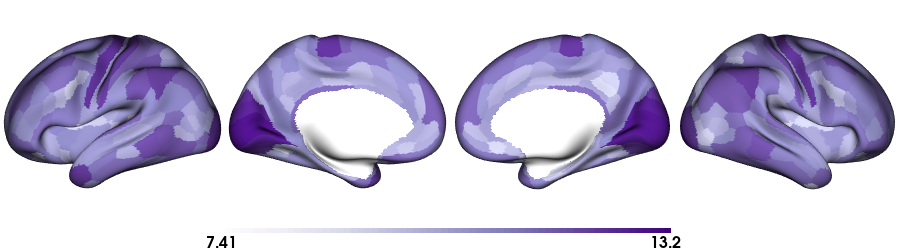

In [60]:
# surface plotting
mtx_S = np.sum(sc,axis=1)

# ---------------------------------
S_surf = map_to_labels(np.log(mtx_S), labels_c69, fill=np.nan, mask=mask_c69)

# Plot surface data 
plot_hemispheres(inf_lh, inf_rh, array_name=S_surf, size=(900, 250), color_bar='bottom', zoom=1.25, 
                 embed_nb=True, interactive=False, share='both', nan_color=(1, 1, 1, 1), 
                 cmap='Purples',transparent_bg=False)

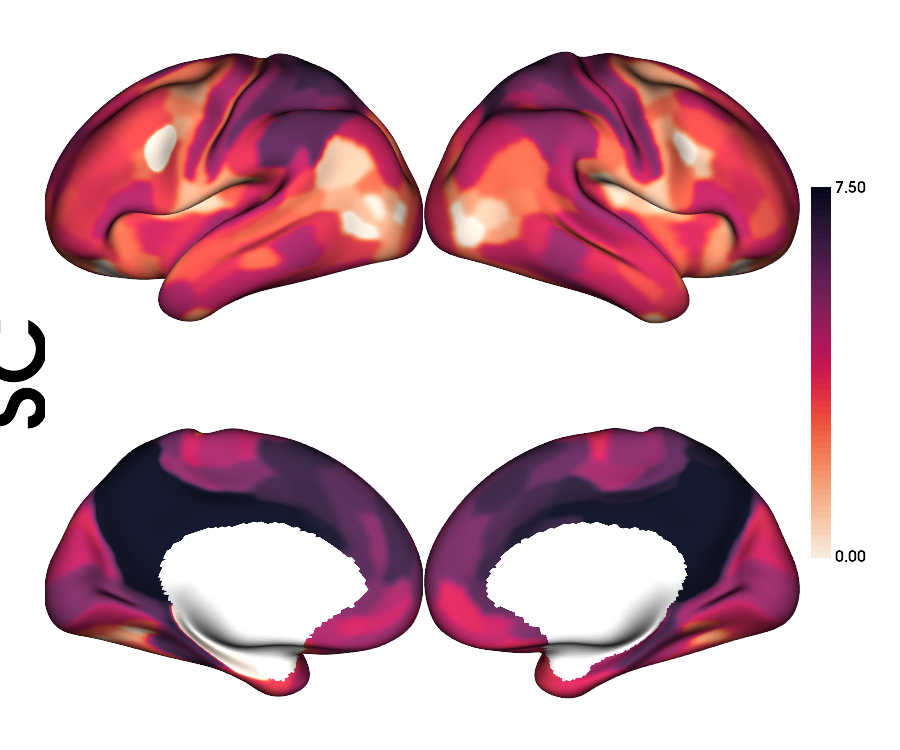

In [66]:
# surface plotting
mtx_Sroi = np.sum(sc*rois,axis=1,dtype=float) 

# ---------------------------------
S_surf = map_to_labels(np.log(mtx_Sroi), labels_c69, fill=np.nan, mask=mask_c69)

# Plot surface data 
plot_hemispheres(inf_lh, inf_rh, array_name=smooth_surf(inf_lh, inf_rh,S_surf, Niter=4), cmap='rocket_r',
                 embed_nb=True,  label_text={'left':['SC']}, color_bar='right',
                 layout_style='grid', color_range=(0,7.5),
                 zoom=1.3, size=(900, 750), nan_color=(1, 1, 1, 1),
                 screenshot=False, filename='/home/bic/rcruces/Desktop/SC-roi_'+subjectID+'_'+atlas+'.png')

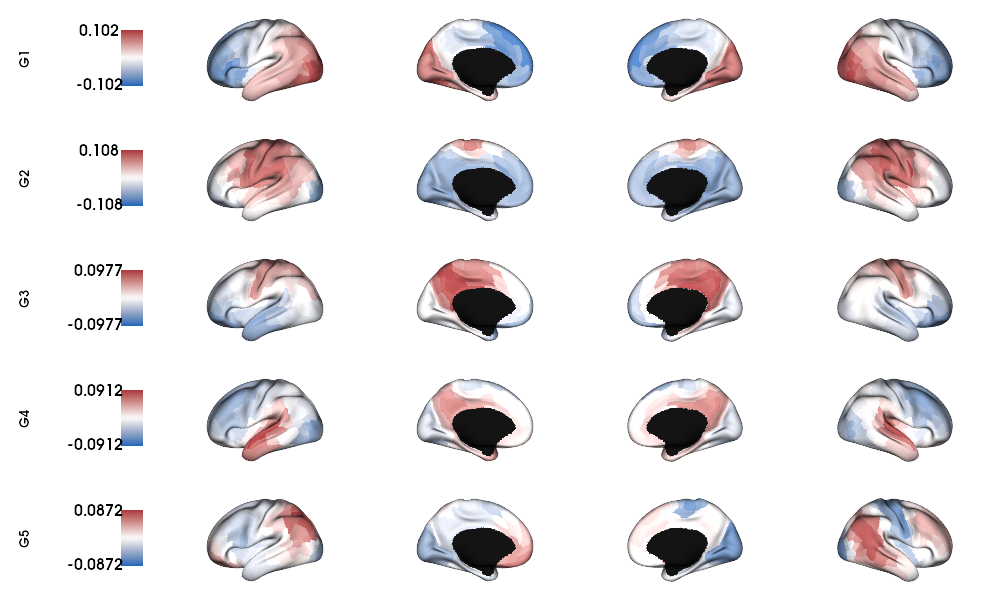

In [62]:
Ngrad=5
# SC Left hemi
gm_SC_L = GradientMaps(n_components=Ngrad, random_state=None, approach='dm', kernel='normalized_angle')
gm_SC_L.fit(sc[0:Ndim, 0:Ndim], sparsity=0)

# SC Right hemi
gm_SC_R = GradientMaps(n_components=Ngrad, alignment='procrustes', kernel='normalized_angle'); # align right hemi to left hemi
gm_SC_R.fit(sc[Ndim:Ndim*2, Ndim:Ndim*2], sparsity=0, reference=gm_SC_L.gradients_)

# Left and right gradients concatenated
SC_gradients = np.concatenate((gm_SC_L.gradients_, gm_SC_R.aligned_), axis=0)

# Map gradients to original parcels
grad = [None] * Ngrad
for i, g in enumerate(SC_gradients.T[0:Ngrad,:]):
     grad[i] = map_to_labels(g, labels_c69, fill=np.nan, mask=mask_c69)

# Plot Gradients
labels=['G'+str(x) for x in list(range(1,Ngrad+1))]
plot_hemispheres(inf_lh, inf_rh, array_name=grad, size=(1000, 600), cmap='vlag',
                  embed_nb=True,  label_text={'left':labels}, color_bar='left',
                  zoom=1.25, nan_color=(0, 0, 0, 1), color_range='sym')

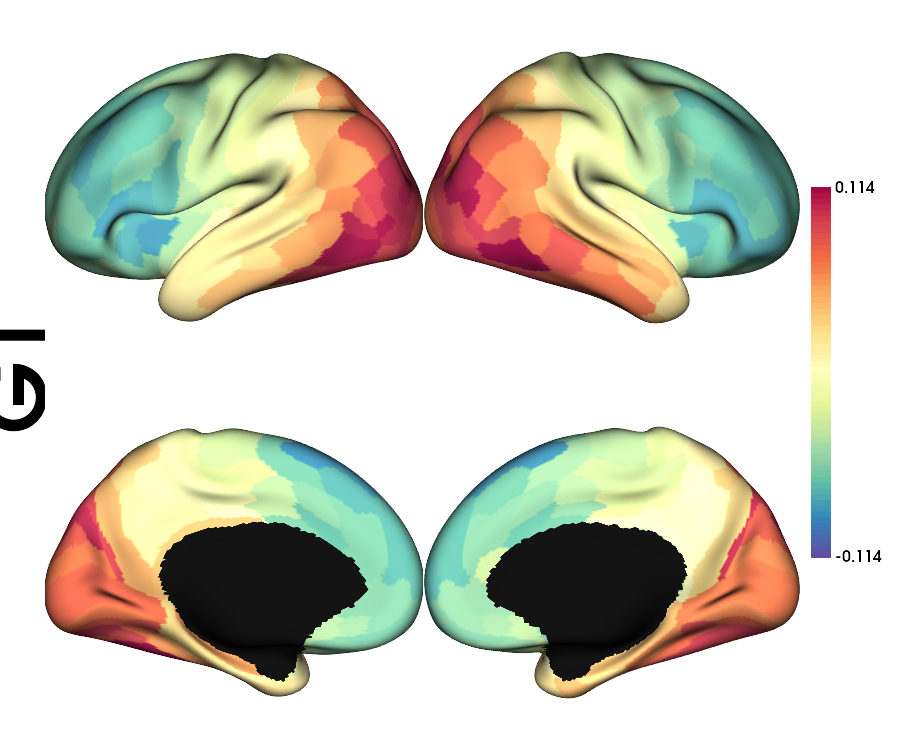

In [144]:
# Plot G1
FC_g1 = map_to_labels(SC_gradients[:,0], labels_c69, fill=np.nan, mask=mask_c69)
plot_hemispheres(inf_lh, inf_rh, array_name=FC_g1, cmap='Spectral_r',
                  embed_nb=True,  label_text={'left':['G1']}, color_bar='right',
                  layout_style='grid', color_range='sym',
                  zoom=1.3, size=(900, 750), nan_color=(0, 0, 0, 1),
                  screenshot=False, filename='/home/bic/rcruces/Desktop/SC-G1_'+subjectID+'_'+atlas+'.png') 

# FA weighted structural connectome

In [145]:
sc_file = subjectDir + '/dwi/connectomes/'+ subjectID + '_space-dwi_atlas-'+atlas+'_desc-iFOD2-40M-SIFT2_full-weighted_connectome.txt'
scw=load_sc(sc_file, Ndim, log=False)

tril_idx = np.tril_indices(len(sc),k=1) 
sc_total = np.sum(sc[tril_idx])

(array([ 7.,  3., 10., 16., 28., 40., 59., 96., 74., 27.]),
 array([ 74.596314 ,  88.5675759, 102.5388378, 116.5100997, 130.4813616,
        144.4526235, 158.4238854, 172.3951473, 186.3664092, 200.3376711,
        214.308933 ]),
 <BarContainer object of 10 artists>)

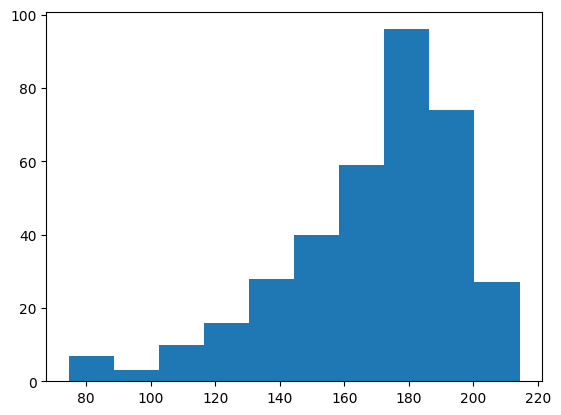

In [146]:
# Histogram of the nodal Strength from the raw connectome
Smtx = np.sum(scw, axis=1)
plt.pyplot.hist(Smtx)

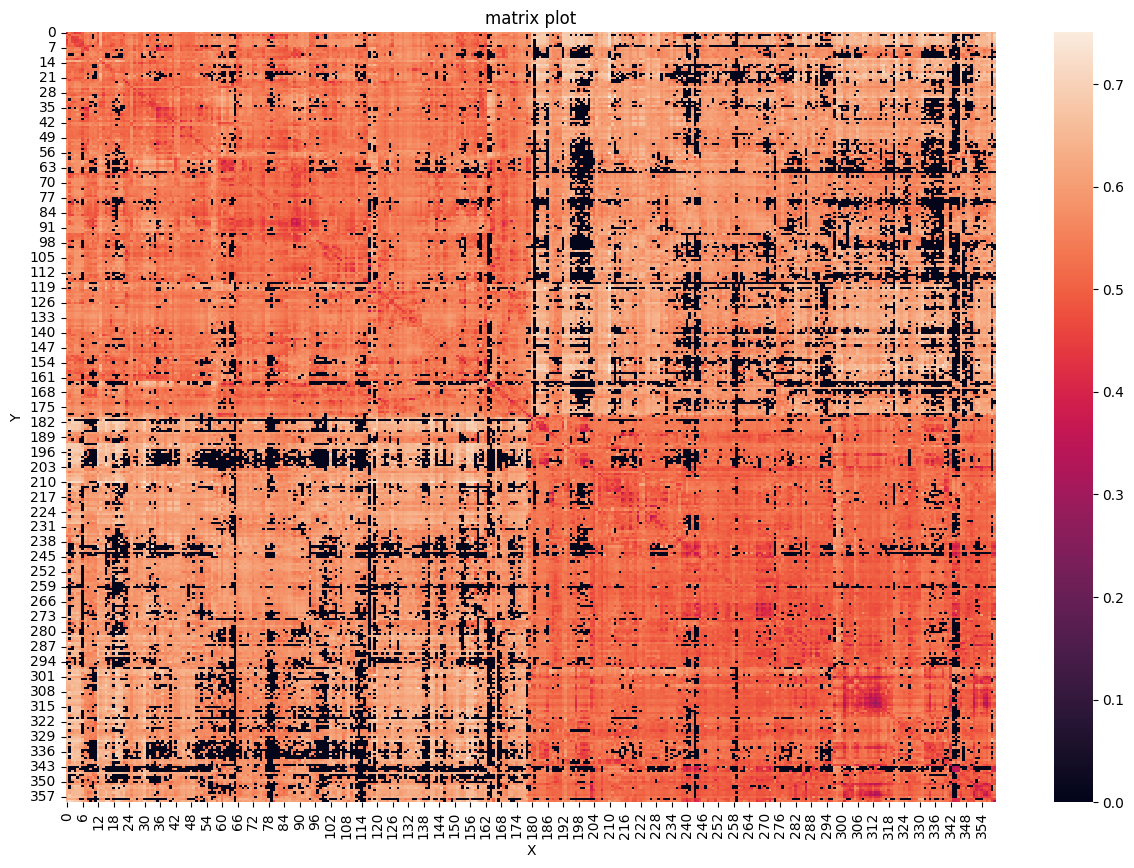

In [147]:
plot_connectome(scw, Title='matrix plot', xlab='X', ylab='Y', col='rocket')

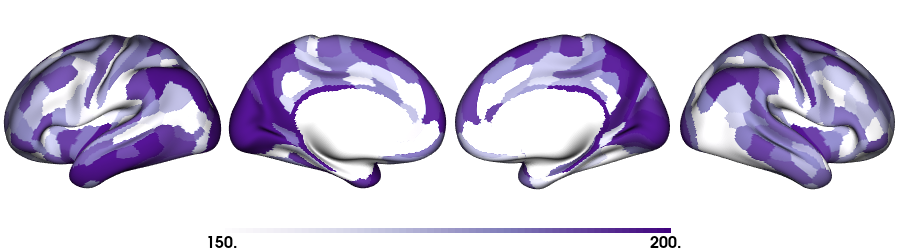

In [148]:
# surface plotting
# ---------------------------------
S_surf = map_to_labels(Smtx, labels_c69, fill=np.nan, mask=mask_c69)

# Plot surface data 
plot_hemispheres(inf_lh, inf_rh, array_name=S_surf, size=(900, 250), color_bar='bottom', zoom=1.25, 
                 embed_nb=True, interactive=False, share='both', nan_color=(1, 1, 1, 1), color_range=(150,200),
                 cmap='Purples',transparent_bg=False)

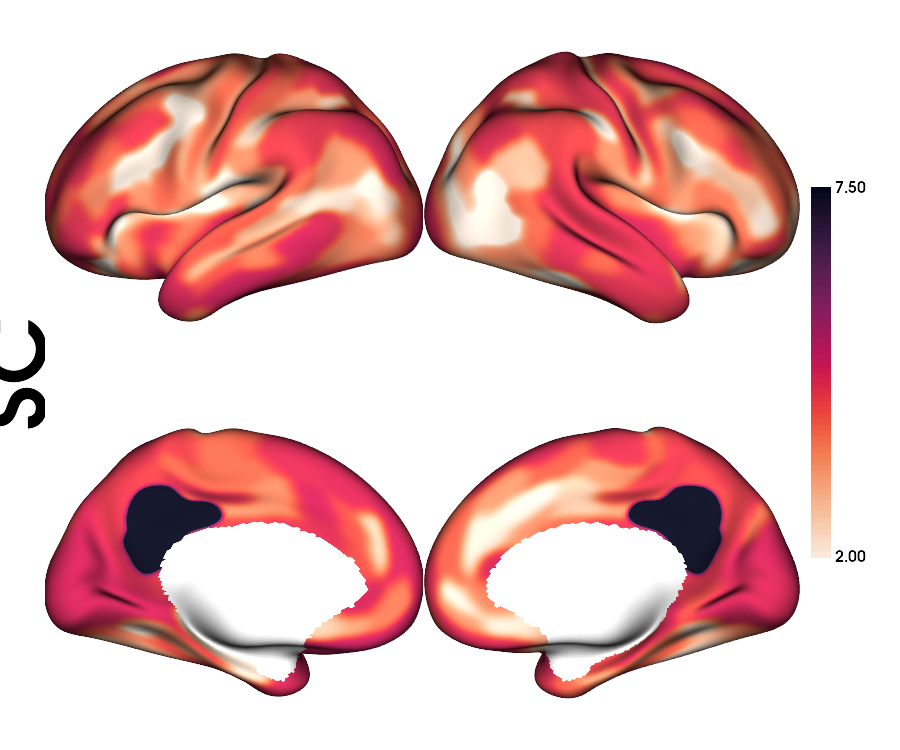

In [149]:
# surface plotting
mtx_Sroi = np.sum(scw*rois,axis=1,dtype=float) 

# ---------------------------------
S_surf = map_to_labels(mtx_Sroi, labels_c69, fill=np.nan, mask=mask_c69)

# Plot surface data 
plot_hemispheres(inf_lh, inf_rh, array_name=smooth_surf(inf_lh, inf_rh,S_surf, Niter=10), cmap='rocket_r',
                 embed_nb=True,  label_text={'left':['SC']}, color_bar='right',
                 layout_style='grid', color_range=(2,7.5),
                 zoom=1.3, size=(900, 750), nan_color=(1, 1, 1, 1),
                 screenshot=False, filename='/home/bic/rcruces/Desktop/SC-roi_'+subjectID+'_'+atlas+'.png')